In [1]:
import time, warnings
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler
import functions as func
import pandas as pd

rs = 32
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

<Figure size 360x288 with 0 Axes>

In [2]:
corr_data = func.red_correlations(data, tr=0.95)

##########################################################

data_nm = func.normalize_n(corr_data, ['class','gender'])

##########################################################

data_smote =func.smote_split(data_nm, 'class',random_state=rs, in_df=False)
data_s_nn = func.smote_split(corr_data, 'class',random_state=rs, in_df=False)

data_nm.head()

,DFA,Ea,Ea2,Ed2_10_coef,Ed2_1_coef,Ed2_2_coef,Ed2_3_coef,Ed2_4_coef,Ed2_5_coef,Ed2_6_coef,...,tqwt_stdValue_dec_35,tqwt_stdValue_dec_36,tqwt_stdValue_dec_4,tqwt_stdValue_dec_5,tqwt_stdValue_dec_6,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9,class,gender
0,0.565310,0.999902,1.000000,0.000061,6.719929e-07,0.000003,0.000026,0.000087,0.000317,0.000048,...,0.005740,0.003267,0.006535,0.006860,0.014577,0.035157,0.044976,0.070611,1,1
1,0.489455,0.999951,1.000000,0.000004,7.668467e-07,0.000005,0.000046,0.000136,0.000144,0.000136,...,0.007579,0.005475,0.009918,0.007871,0.010565,0.023650,0.034650,0.064451,1,1
2,0.428738,0.999976,1.000000,0.000005,4.769413e-07,0.000004,0.000038,0.000147,0.000072,0.000129,...,0.006834,0.002816,0.004820,0.004175,0.008409,0.020432,0.026065,0.037461,1,1
3,0.819111,0.775793,0.882092,0.048392,3.306638e-02,0.069904,0.066221,0.132926,0.134877,0.221548,...,0.096891,0.118559,0.052193,0.043837,0.032883,0.049346,0.058040,0.100590,1,0
4,0.822669,0.680682,0.796543,0.193636,3.588929e-02,0.046301,0.044657,0.209088,0.078664,0.172272,...,0.069377,0.129089,0.054718,0.044076,0.033403,0.044226,0.058777,0.111781,1,0


In [3]:
trnX, trnY, tstX, tstY, labels = data_smote
X = np.append(trnX, tstX, axis=0)
y = np.append(trnY, tstY, axis=0).reshape((-1))
print(X.shape)

trnX, trnY, tstX, tstY, labels = data_s_nn
Xn = np.append(trnX, tstX, axis=0)
yn = np.append(trnY, tstY, axis=0).reshape((-1))
Xn = StandardScaler().fit_transform(Xn)
print(Xn.shape)

(1017, 707)
(1017, 707)


<Figure size 432x288 with 0 Axes>

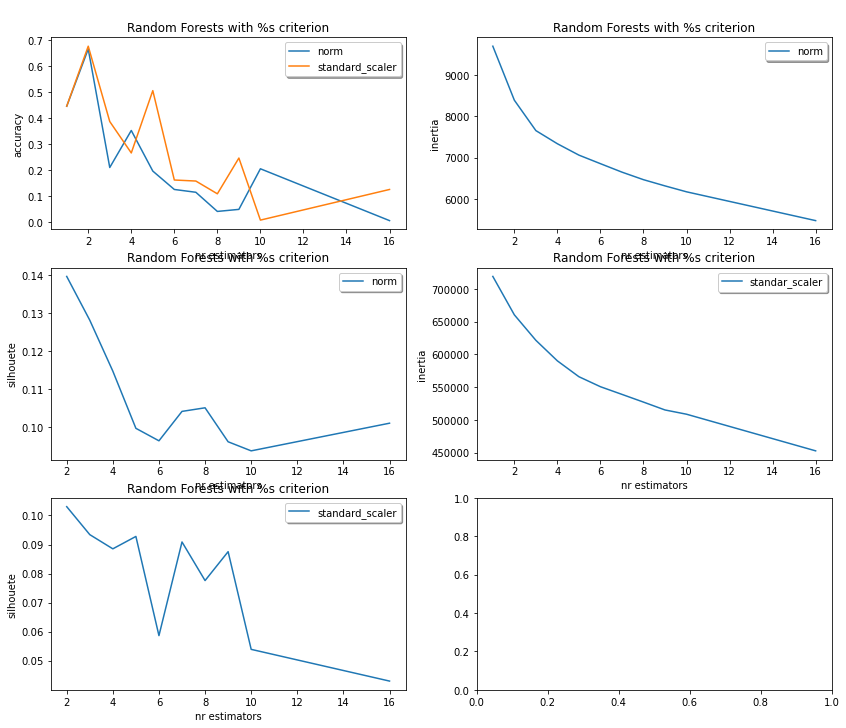

In [4]:
n_clusters = [1,2,3,4,5,6,7,8,9,10,16]

plt.figure()
fig, axs = plt.subplots(3, 2, figsize=(14, 12), squeeze=False)
accs = []
accsn=[]
inertias = []
inertiasn=[]
sil = []
siln = []

for n in n_clusters:
    kmeans = cluster.KMeans(n_clusters=n, random_state=1).fit(X)
    kmeansn = cluster.KMeans(n_clusters=n, random_state=1).fit(Xn)
    prdY = kmeans.labels_
    prdYn = kmeansn.labels_
    accs.append(metrics.accuracy_score(y, prdY))
    accsn.append(metrics.accuracy_score(yn, prdYn))
    inertias.append(kmeans.inertia_)
    inertiasn.append(kmeansn.inertia_)
    if n!=1:
        sil.append(metrics.silhouette_score(X, prdY))
        siln.append(metrics.silhouette_score(Xn, prdYn))

values={}
ivalues={}
ivaluesn={}
svalues={}
svaluesn={}
values["norm"] = accs
values["standard_scaler"] = accsn
ivalues["norm"] = inertias
ivaluesn["standar_scaler"] = inertiasn
#ivalues2["mekie"] = inertias[1:] 
svalues["norm"] = sil
svaluesn["standard_scaler"] = siln
func.multiple_line_chart(axs[0, 0], n_clusters, values, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs[0, 1], n_clusters, ivalues, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'inertia', percentage=False)
func.multiple_line_chart(axs[1, 0], n_clusters[1:], svalues, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'silhouete', percentage=False)
func.multiple_line_chart(axs[1, 1], n_clusters, ivaluesn, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'inertia', percentage=False)
func.multiple_line_chart(axs[2, 0], n_clusters[1:], svaluesn, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'silhouete', percentage=False)
#func.multiple_line_chart(axs[1, 1], n_clusters[1:], ivalues2, 'Random Forests with %s criterion', 
#                         'nr estimators', 'inertia', percentage=False)
plt.show()

In [5]:
k=2

kmeans_model = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
y_pred = kmeans_model.labels_

 
print("Accuracy: ", metrics.accuracy_score(y, y_pred))
print("Silhouette:",metrics.silhouette_score(X, y_pred))
print("Adjusted rand score: ", metrics.cluster.adjusted_rand_score(y, y_pred))

print("\nSum of squared distances:",kmeans_model.inertia_)
print("Calinski Harabaz:",metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin:",metrics.davies_bouldin_score(X, y_pred))
print("Silhouette per instance:",metrics.silhouette_samples(X, y_pred))

Accuracy:  0.6656833824975418
Silhouette: 0.1396720087625076
Adjusted rand score:  0.10831379301312928

Sum of squared distances: 8386.583259089906
Calinski Harabaz: 157.71725510485507
Davies Bouldin: 2.345947067993981
Silhouette per instance: [0.19451873 0.03153632 0.13233493 ... 0.02542705 0.16592447 0.18105254]


In [6]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

X_k = SelectKBest(f_classif, k=2).fit_transform(Xn, y)
X_pca = PCA(n_components=2, copy=True).fit_transform(Xn)
print(X_k.shape)
print(X_pca.shape)

(1017, 2)
(1017, 2)


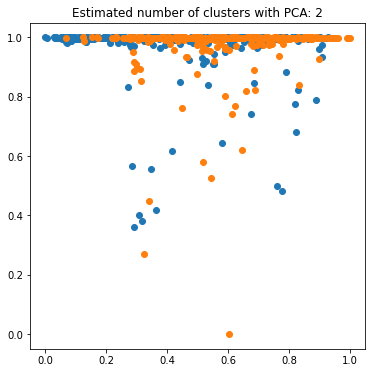

In [7]:
k=2

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1])
    
    
plt.title('Estimated number of clusters with PCA: %d' % n_clusters_)
plt.show()

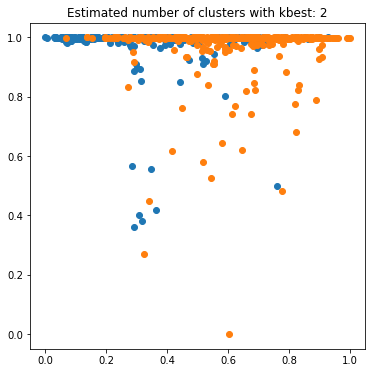

In [8]:
k=2

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_k)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1])
    
plt.title('Estimated number of clusters with kbest: %d' % n_clusters_)
plt.show()

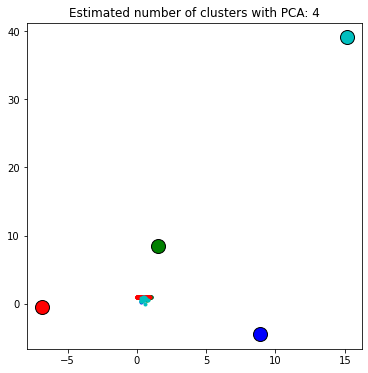

In [9]:
k=4

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters with PCA: %d' % n_clusters_)
plt.show()

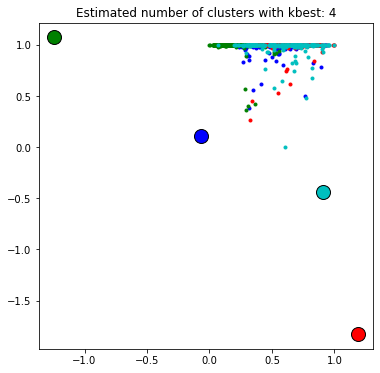

In [10]:
k=4

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_k)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters with kbest: %d' % n_clusters_)
plt.show()

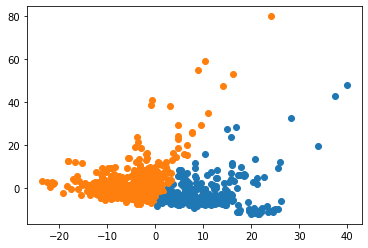

In [11]:
plt.figure()
#plt.set_title("%s x %s"%(var1,var2))
#plt.set_xlabel(var1)
#plt.set_ylabel(var2)

ms = cluster.KMeans(n_clusters=2, random_state=1)
ms.fit(X_pca)

for i,x in enumerate(X_pca):
    if ms.labels_[i] ==1:
        plt.scatter(x[0],x[1], c="tab:blue", label="true")
    else:
        plt.scatter(x[0],x[1], c="tab:orange", label="false")
        
plt.show()

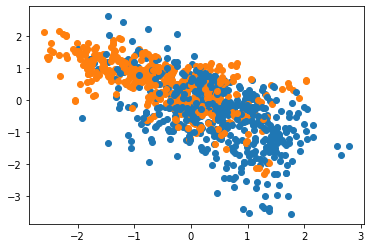

In [12]:
plt.figure()
#plt.set_title("%s x %s"%(var1,var2))
#plt.set_xlabel(var1)
#plt.set_ylabel(var2)
for i,x in enumerate(X_k):
    if y[i] ==1:
        plt.scatter(x[0],x[1], c="tab:blue", label="true")
    else:
        plt.scatter(x[0],x[1], c="tab:orange", label="false")
        
plt.show()

{'icoord': [[135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [95.0, 95.0, 114.375, 114.375],
  [85.0, 85.0, 104.6875, 104.6875],
  [75.0, 75.0, 94.84375, 94.84375],
  [65.0, 65.0, 84.921875, 84.921875],
  [55.0, 55.0, 74.9609375, 74.9609375],
  [45.0, 45.0, 64.98046875, 64.98046875],
  [35.0, 35.0, 54.990234375, 54.990234375],
  [25.0, 25.0, 44.9951171875, 44.9951171875],
  [15.0, 15.0, 34.99755859375, 34.99755859375],
  [5.0, 5.0, 24.998779296875, 24.998779296875]],
 'dcoord': [[0.0, 0.33110335626637344, 0.33110335626637344, 0.0],
  [0.0, 0.3318198145073149, 0.3318198145073149, 0.33110335626637344],
  [0.0, 0.34665360343301177, 0.34665360343301177, 0.3318198145073149],
  [0.0, 0.3471594033389344, 0.3471594033389344, 0.34665360343301177],
  [0.0, 0.4015466902160713, 0.4015466902160713, 0.3471594033389344],
  [0.0, 0.40831006565181693, 0.40831006565181693, 0.4015466902160713],
  [0.0, 0.4297865825757203, 0.

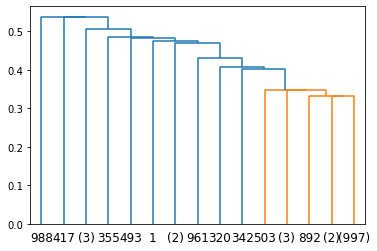

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_k)
dendrogram(Z,p=15, truncate_mode="lastp")